In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
from matplotlib import pyplot as plt

/kaggle/input/kuslar/processed_dataset.csv
/kaggle/input/kuslar/Iris.csv
/kaggle/input/kuslar/data_with_nans.csv


## ÖNSÖZ

Bu not defteri tamamen makine öğrenmesi üzerinedir. Bu not defterinden önce işin analiz kısmını az ya da çok kavramış olmanız beklenir.
* Pandas kütüphanesine hakim olmalı ve neler yapabileceğinizi bilmeli
* Numpy kütüphanesine tamamen hakim olmasanız da mantığını bilmeli
* Seaborn ve Matplotlib görselleştirmelerinde ortalama derecede bilgiye sahip olmalı
* Ortalama istatistik bilgisine sahip olmalı
* Tek yön, çift yön, p-sayısı, f-test ve benzeri hipotest testleri hakkında ortalama bilgiye sahip olmalısınız.

## VERİYİ HAZIRLAMA
Gereksiz kolonların düşürülmesi, verilerden çıkarım yapılması ve bu çıkarımların verilere aktarılması bir süreç. Bu süreç, veriyi yapay zeka adına hazırlamak olarak nitelendiriliyor.

In [2]:
data = pd.read_csv("/kaggle/input/kuslar/data_with_nans.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [3]:
data = data.drop(columns="Unnamed: 0") #gereksiz index düşürüldü
data.describe() #bizim veri setimiz özelinde bu şu an gereksiz fakat gösterdim. zira öncelikle çiçekleri türlerine göre gruplandırmamız ve sonrasında
#bakmamız mantıklı olacaktır

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.groupby("Species").agg(["min","max","std","mean"]) #üç türde de ciddi farklılıklar olduğunu görebilmek adına bunu yaptım.

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

### NaN Değerler

In [5]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

Boş verileri doldurmak ya da direkt olarak atmak gibi iki yaklaşım var. Bu durum veriden veriye değişiyor, bizim veri setimiz örneğinde elimizde kuvvetli miktarda referans veri olduğu için dolduracağız.
Bizim örneğimiz için ortalama ile dolduracağız. Farklı doldurma yöntemleri de var.

In [6]:
data.groupby("Species").sum() #grupları yeniden görüyorum

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1770,292.0,200.0,91.2,17.7
Iris-versicolor,4671,314.4,151.5,217.9,71.0
Iris-virginica,7924,366.6,167.8,306.3,109.6


In [7]:
dataC = data.copy()#orijinal veriye olur da bakmam gerekirse diye kopyalama yaptım.
species_groups = dataC.groupby("Species") #aynı türlerin ortalamasını alıyorum ki farklı türün ortalaması araya karışıp veriyi saptırmasın.

for setosa in species_groups.get_group("Iris-setosa").columns[1:5]:
    dataC.loc[dataC["Species"]=="Iris-setosa", setosa] = species_groups.get_group("Iris-setosa")[setosa].fillna(value=species_groups.get_group("Iris-setosa")[setosa].mean())
for versicolor in species_groups.get_group("Iris-versicolor").columns[1:5]:
    dataC.loc[dataC["Species"]=="Iris-versicolor", versicolor] = species_groups.get_group("Iris-versicolor")[versicolor].fillna(value=species_groups.get_group("Iris-versicolor")[versicolor].mean())
for virginica in species_groups.get_group("Iris-virginica").columns[1:5]:
    dataC.loc[dataC["Species"]=="Iris-virginica", virginica] = species_groups.get_group("Iris-virginica")[virginica].fillna(value=species_groups.get_group("Iris-virginica")[virginica].mean())


In [8]:
dataC.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Aykırı Değerler

<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>

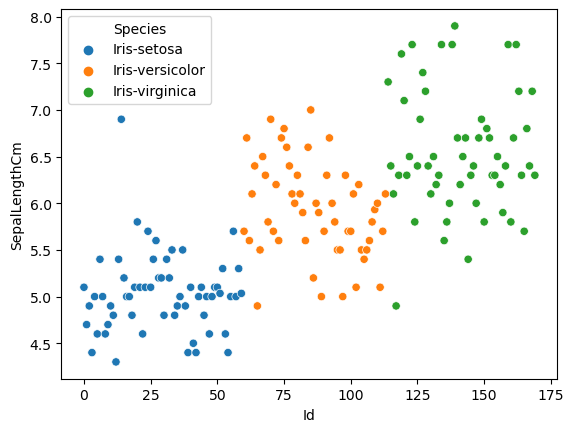

In [9]:
sns.scatterplot(data=dataC, x="Id", y="SepalLengthCm", hue="Species") #çok net görülüyor yok tür uzunluğu olarak virginica>versicolor>setosa şeklinde
#setosa kısmında bir aykırı değer var, bu değer ya yanlış girilmiş ya da setosa yerine versicolor ya da verginica'ya ait. buna biz karar vereceğiz.
#aynı şekilde versicolor kısmına kaçan bir verginica da var, bu değerin ya mavi ya da turuncu olması gerekiyor.
#aykırı değerlerin temizlenmesi çok önemli

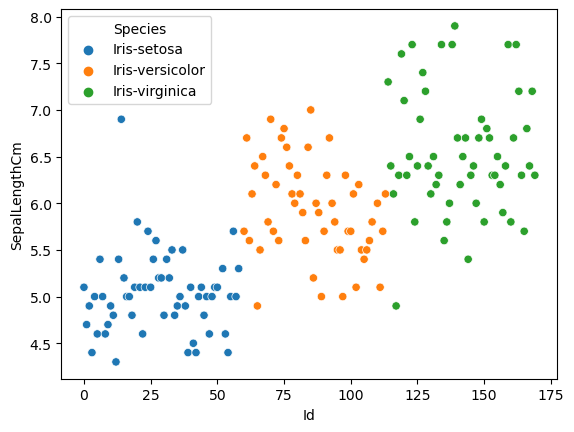

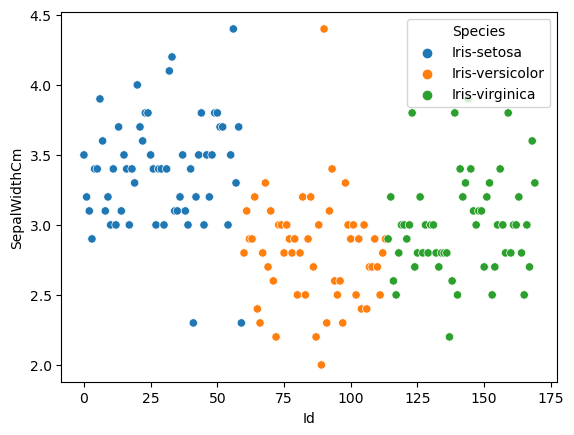

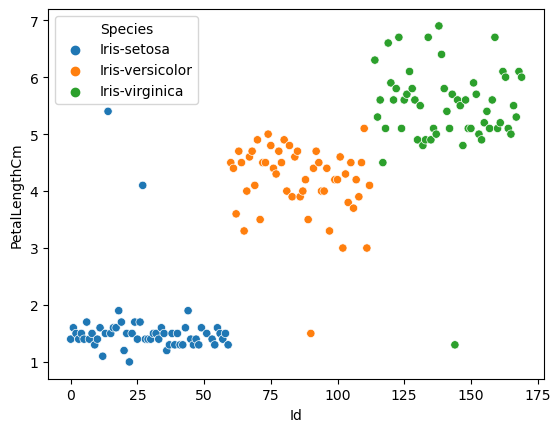

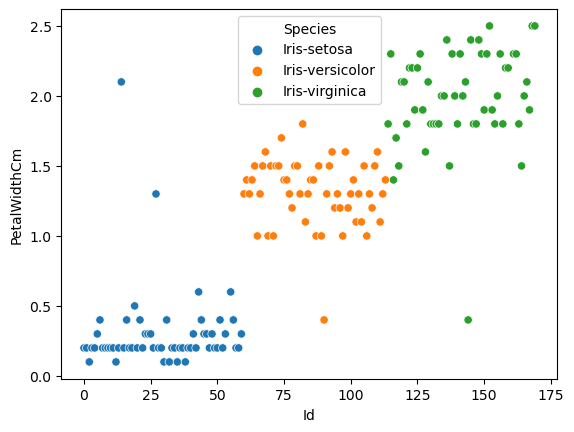

In [10]:
#bazen ciddi manada büyük veri setleri geliyor ve çok fazla column oluyor. bu noktada tek tek columnları yazmamak için:
for columns in dataC.columns[1:5]:
    sns.scatterplot(data=data, x="Id", y=columns, hue="Species")
    plt.show()#her bir sütunu ayrı ayrı göstermesi için bunu girdim

Bu görsellerde aykırı değerler çok daha belli oluyor. Bu aykırı değerlerin temizlenmesi çok önemli.

#### Standart Sapma Yöntemi

3 sigma, 3 standart sapma olarak da geçer. Normal dağılımda ortalamanın x olduğunu hayal edelim, x+standart sapma ilk leveldır ve biz burada x+3standart sapma kullanacağız. Bu oran verinin yaklaşık %99.7'lik hacmini temsil eder. Bu yöntem genelde işe yarar fakat her zaman değil.

![normal distribution %99.7 görseli](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg)

In [11]:
setosa=dataC.loc[dataC["Species"]=="Iris-setosa"]
versicolor=dataC.loc[dataC["Species"]=="Iris-versicolor"]
virginica=dataC.loc[dataC["Species"]=="Iris-virginica"]

In [12]:
for species in dataC["Species"].unique():
    species_specialized=dataC.loc[dataC["Species"]==species]
    for column in dataC.columns[1:5]:
        species_specialized_std = species_specialized[column].std()
        species_specialized_mean = species_specialized[column].mean()
        threestd_plus = species_specialized_mean + (3 * species_specialized_std)
        threestd_minus = species_specialized_mean - (3 * species_specialized_std)
        aykiri_degerler= species_specialized[(species_specialized[column] > threestd_plus) | (species_specialized[column] < threestd_minus)].index
        for index in aykiri_degerler:#tekrar loop aldım çünkü aynı değerleri yeniden göremeyince key error veriyor, fakat erro
            #yerine sonraki indexe geçmesini istiyoruz
            try:
                dataC.drop(index=index, inplace=True)
            except KeyError:
                pass

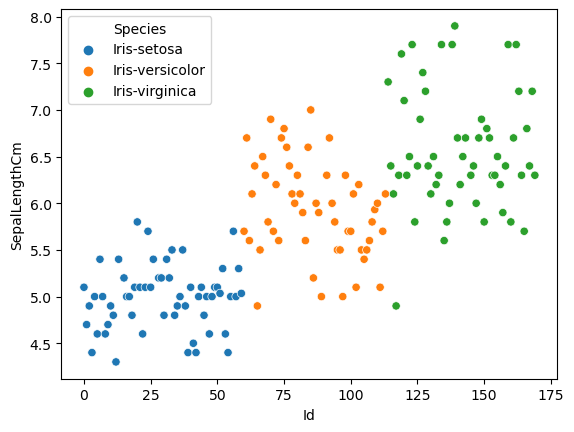

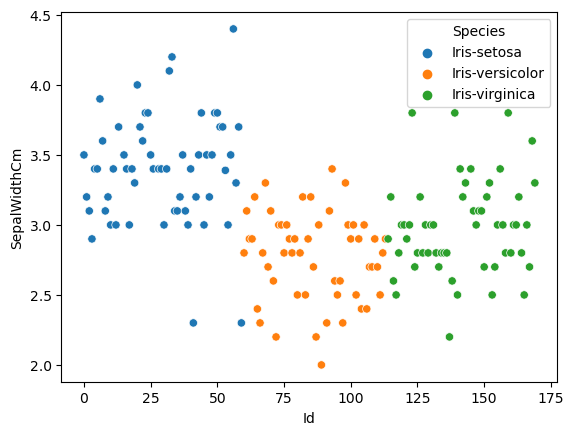

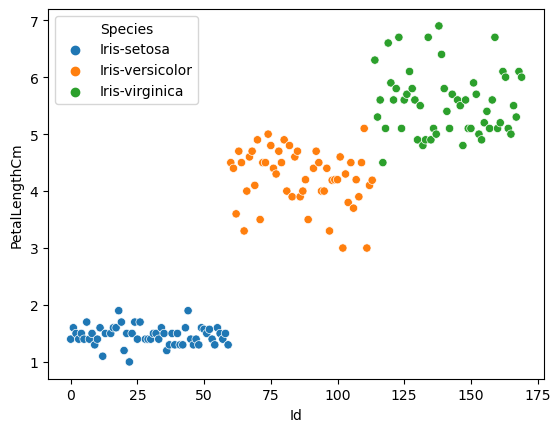

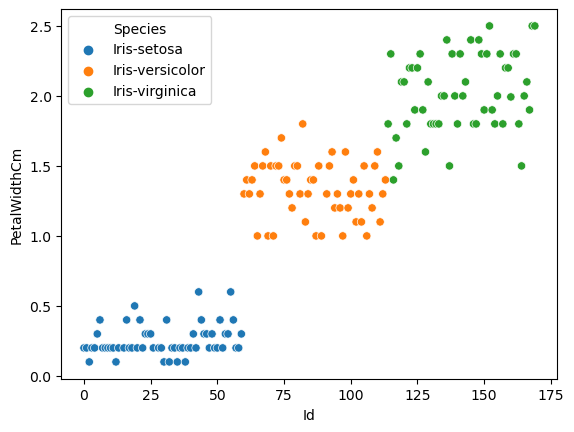

In [13]:
#bakalım aykırı değerler ne olmuş
for columns in dataC.columns[1:5]:
    sns.scatterplot(data=dataC, x="Id", y=columns, hue="Species")
    plt.show()

#### IQR - QUANTILE 

Farklı bir yöntem, boxplot çizdirilerek medyana göre belirlenmiş max ve min kısımlarının üstlerindeki değerleri bulur ve atar.

![boxplot outlier görseli](https://miro.medium.com/max/1400/0*Rpd3tQj-kUpwObeA)

In [14]:
for species in dataC["Species"].unique():
    species_specialized=dataC.loc[dataC["Species"]==species]
    for column in dataC.columns[1:5]:
        species_specialized_q1 = species_specialized[column].quantile(0.25)
        species_specialized_q3 = species_specialized[column].quantile(0.75)
        species_specialized_iqr= species_specialized_q3 - species_specialized_q1
        species_specialized_min = species_specialized_q1 - (1.5 * species_specialized_iqr)
        species_specialized_max = species_specialized_q3 + (1.5 * species_specialized_iqr)
        aykiri_degerler= species_specialized[(species_specialized[column] > species_specialized_max) | (species_specialized[column] < species_specialized_min)].index
        for index in aykiri_degerler:
            try:
                dataC.drop(index=index, inplace=True)
            except KeyError:
                pass

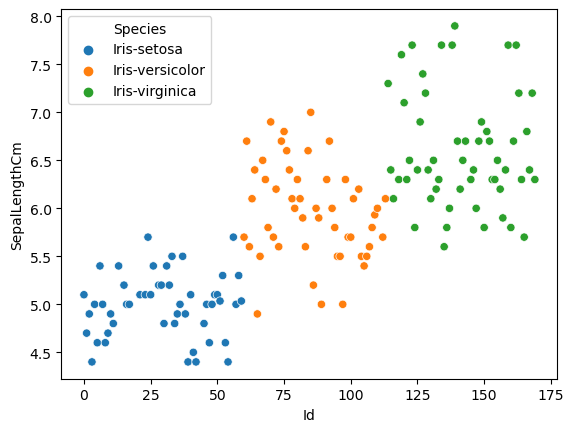

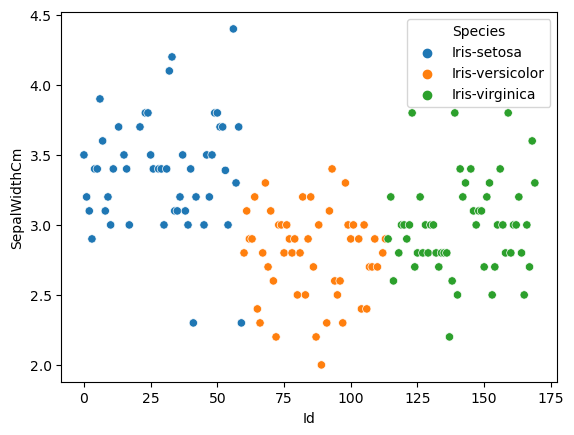

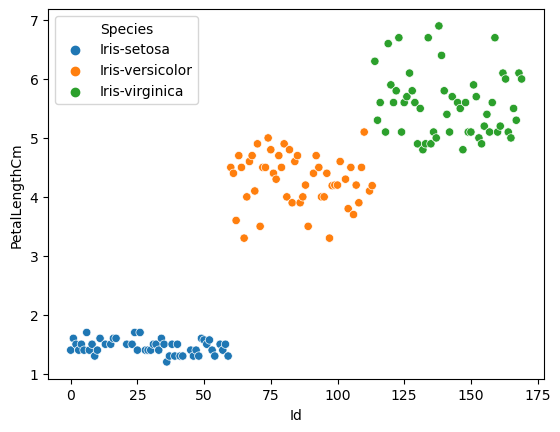

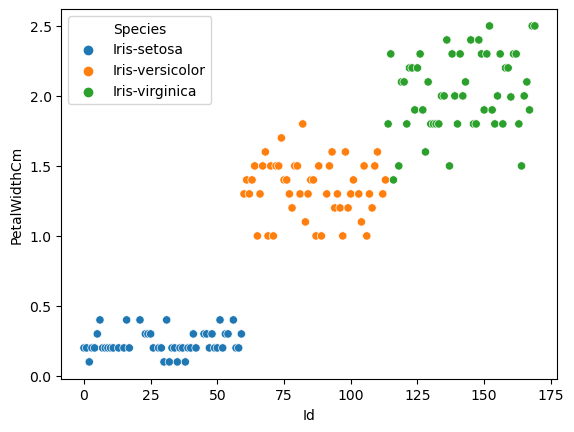

In [15]:
#yeniden bakış
for columns in dataC.columns[1:5]:
    sns.scatterplot(data=dataC, x="Id", y=columns, hue="Species")
    plt.show()

Genellikle gerçek hayat kodlamalarında veri temizliği bu kadar kısa ve net sürmez, aşırı üstün körü bir anlatım ve aşırı basit bir veri örneğimiz var. Buradaki işimiz bitti, modele geçebiliriz.

In [16]:
dataC.to_csv("dataC.csv")#son olarak verimi kaydettim.

## MODEL OLUŞTURMA

İş her zaman encoding ile başlar. Makinenin str değerlerini bir numaraya eşlemesi gerekir. Örneğin elma, armut, muz için 1, 2, 3 atamalarını yaparız ve böylece makine 1'in elma, 2'nin armut ve 3'ün muz olduğunu anlar. Bunun için LabelEncoding ve OneHotEncoding adlı iki metod var. İkisinin de avantajları ve dezavantajları mevcut, veri tipine ve veri yapısına göre bu yöntemler değişmektedirler.

![one hot encoding and label encoding](https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.)

**One-hot encoding:** Kategorik değişkenlerin ikili vektörlere dönüştürülmesi için kullanılır. Bu yöntem, her kategoriyi ayrı bir özellik olarak temsil eder ve her özelliğin değeri 0 veya 1'dir. One-hot encoding, özellikler arasında eşit uzaklık sağlar ve özelliklerin birbirleriyle etkileşimi olmadığı için çoklu regresyon modellerinde kullanılması önerilir.

**Örnekler:**

Bir meyve veri setinde, "elma", "armut" ve "portakal" gibi kategorik özellikler varsa, her biri için ayrı bir özellik oluşturulabilir. Örneğin, "elma" özelliği için bir özellik vektörü [1,0,0] olacaktır.

Bir müşteri veri setinde, "erkek" ve "kadın" gibi cinsiyet kategorileri varsa, her bir müşteri için ayrı bir özellik oluşturulabilir. Örneğin, "erkek" özelliği için bir özellik vektörü [1,0] olacaktır.

**Label encoding**: Kategorik değişkenleri sıralı sayısal değerlere dönüştürmek için kullanılır. Bu yöntem, sınıflandırma modellerinde kullanılmak için uygundur ve sınıflar arasında doğrusal bir ilişki olduğunu varsayar.

**Örnekler:**

Bir müşteri veri setinde, "yüksek", "orta" ve "düşük" gibi gelir kategorileri varsa, bu kategoriler sıralı bir şekilde sayısal değerlere dönüştürülebilir. Örneğin, "yüksek" için 3, "orta" için 2 ve "düşük" için 1 sayısal değerleri atanabilir.

Bir derecelendirme veri setinde, "çok iyi", "iyi", "orta", "kötü" ve "çok kötü" gibi kategoriler varsa, bu kategoriler sıralı bir şekilde sayısal değerlere dönüştürülebilir. Örneğin, "çok iyi" için 5, "kötü" için 2 sayısal değerleri atanabilir.

Özetle, **one-hot encoding, sınıflar arasında eşit uzaklık ve etkileşimsiz özellikler** gerektiren çoklu regresyon modellerinde kullanım için uygunken, **label encoding, sınıflar arasında doğrusal bir ilişki** varsayarak sınıflandırma modellerinde kullanım için daha uygundur. Ancak, label encoding kategorik verilerin sayısal formata dönüştürülmesinde bir dezavantaj sunar. Özellikle, sayısal değerler sıralı olarak atanırsa, modelde yanıltıcı sonuçlar üretilebilir. Örneğin, "orta" ile "düşük" arasında doğrusal bir ilişki olduğu varsayıldığında, "düşük" ile "yüksek" arasında da aynı doğrusal ilişkinin olduğu varsayılabilir ki bu gerçek hayatta böyle olmayabilir. Bu durumda, one-hot encoding yöntemi daha doğru sonuçlar üretebilir.

In [17]:
dataC = dataC.drop(columns="Id")#ihtiyacım olmadığı için attım

In [18]:
from sklearn.preprocessing import OneHotEncoder #ben labelencoder kullanacağım.
from sklearn.preprocessing import LabelEncoder #fakat bilmek adına iki encodingi de yapacağım.
le = LabelEncoder()
oe = OneHotEncoder()
dataC = dataC.reset_index(drop=True) #veride düşürme işlemleri yaparken indexin de içinden geçtiğimiz için reset atıyoruz
dataC_le = dataC.copy() #le encoding datam bu olacak
dataC_oe = dataC.copy() #oe encoding datam bu olacak

In [19]:
#label encoding işlemi
dataC_le["Species"] = le.fit_transform(dataC["Species"])

In [20]:
#onehot encoding işlemi
unique_species = dataC['Species'].unique() #neye göre sınıflandıracağımı alıyorum ve kaydediyorum.
categories = [unique_species]
species_encoded = oe.fit_transform(dataC['Species'].astype('category').cat.codes.values.reshape(-1, 1)) #onehot encoding işlemi
#encodda çıkanları dataframe olarak kaydediyorum, encoding sonuçlarını array olarak değer veriyorum, column isimlerini
#de gene kategori adlarından veriyorum
species_encoded_df = pd.DataFrame(species_encoded.toarray(), columns=oe.get_feature_names_out(categories))
#onehot encoding yapılmış sütunları 'dataC' veri çerçevesine ekliyorum, eklerken "species" kısmını düşürmeyi ihmal etmiyorum
dataC_oe = pd.concat([dataC.drop('Species', axis=1), species_encoded_df], axis=1)


In [21]:
#ufak kontroller
dataC_le.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
dataC_oe.isna().sum()

SepalLengthCm                                           0
SepalWidthCm                                            0
PetalLengthCm                                           0
PetalWidthCm                                            0
(Iris-setosa_0, Iris-versicolor_0, Iris-virginica_0)    0
(Iris-setosa_1, Iris-versicolor_1, Iris-virginica_1)    0
(Iris-setosa_2, Iris-versicolor_2, Iris-virginica_2)    0
dtype: int64

In [23]:
dataC_le.dtypes #herhangi bir object ya da string yok, sadece float ve int var, olması gerektiği gibi

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [24]:
dataC_oe.dtypes #herhangi bir object ya da string yok, sadece float ve int var, olması gerektiği gibi

SepalLengthCm                                           float64
SepalWidthCm                                            float64
PetalLengthCm                                           float64
PetalWidthCm                                            float64
(Iris-setosa_0, Iris-versicolor_0, Iris-virginica_0)    float64
(Iris-setosa_1, Iris-versicolor_1, Iris-virginica_1)    float64
(Iris-setosa_2, Iris-versicolor_2, Iris-virginica_2)    float64
dtype: object

### train-test-split

"Train-test-split", bir makine öğrenimi modelini eğitmek ve test etmek için kullanılan bir yöntemdir. Bu yöntem, veri kümesini iki alt küme olan eğitim verisi ve test verisi olarak ayırarak çalışır. Eğitim verisi, modelin öğrenmek için kullandığı verilerdir, test verisi ise modelin performansını değerlendirmek için kullanılan verilerdir.

İlk adım olarak, verilerinizin girdilerini ve hedef çıktılarını ayırmak için X ve y değişkenlerini tanımlayın. Girdiler, makine öğrenimi modelinizin öğreneceği özelliklerdir, hedef çıktılar ise modelin tahmin etmeye çalışacağı sonuçlardır.

Daha sonra, "train_test_split" fonksiyonunu kullanarak verilerinizi rastgele eğitim ve test alt kümelerine ayırın. Bu fonksiyon, eğitim ve test verilerinin oranını belirlemenize ve rastgele bir bölümleme yapmanıza olanak tanır.

Son olarak, eğitim verilerinizi kullanarak bir makine öğrenimi modeli oluşturun ve test verilerini kullanarak modelinizin performansını değerlendirin.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#açıkça belli ki eğitim verilerim, yani x, species dışındaki her şey.
#hedefim ise species'i bulmak, yani çiçeklerin türünü bulmak.
train = dataC_le.loc[:,dataC_le.columns != "Species"] #species dışındaki her şeyi seçiyorum
test = dataC_le.loc[:,dataC_le.columns == "Species"] #speciesi seçiyorum, hedefimi
split = 0.2 #veriyi eğitim ve test olarak rastgele yüzde kaç bölümek istediğimizi soruyor, ben %20 dedim.
#fakat %20 gerçekten çok fazla. eğer elimizde çok fazla veri varsa, örneğin milyonluk, bu rakam 0.02'ye bile düşebilir.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=split, random_state=3169)
#sırasıyla train,test ve spliti girdim. bunlar bize dört adet döngü sağlayacak.
#x_train = x eğitim kolonunun %80'i, çünkü %20 seçtik.
#x_test = x eğitim kolonunun %20'si, çünkü %20 seçtik.
#y_train = y test kolonunun %80'i, çünkü %20 seçtik. bizim örneğimizde species
#y_test = y test kolonunun %20'si, çünkü %20 seçtik. bizim örneğimizde species
#random state ise tohum değerini ifade eder

In [28]:
x_train.shape

(124, 4)

In [29]:
x_test.shape

(31, 4)

In [30]:
y_train.shape

(124, 1)

In [31]:
y_test.shape #boyutlar da seçimimizi kanıtlar nitelikte.

(31, 1)

Burada önemli bir nokta var ki o da oluşturmuş olduğumuz verilerin dağılımlarını görmek. Örneğin, olur da train setimizdeki bütün veriler sadece tek bir sınıf için dağılırsa ya da tek bir sınıf için yoğunluklu olarak dağılırsa problem yaşayacağızdır. Çünkü bu sebepten ötürü model sadece tek bir sınıfı tahmin etmeyi öğrenebilir. Bu bağlamda eğitim setimizin görece homojen dağıldığını görmemiz lazım.

In [32]:
y_train.value_counts() #görece homojen, hoş bir dağılım var.

Species
2          45
1          43
0          36
dtype: int64

In [33]:
y_test.value_counts() #buradaki dağılım pek de homojen değil. bu bağlamda test ve train datasında değişim yapılabilir.
#fakat bizim datamızın örneğinde uğraşmayacağım.

Species
0          14
2           9
1           8
dtype: int64

In [34]:
dataC["Species"].value_counts()

Iris-virginica     54
Iris-versicolor    51
Iris-setosa        50
Name: Species, dtype: int64

### baseline modelleme
hangi modelleme metodunun kullanılacağı her zaman sorulmalı. Bu durumda, temel modelimiz yalnızca çiçek türlerini rastgele tahmin etmek veya her veri noktası için tek bir tür tahmin etmek ise, 3 farklı sınıfın eşit olarak dengelendiği için (hemen hemen eşit, asıl sayılar üstte gözükmekte) model doğruluğunun %33 veya 0,33 olmasını bekleriz.
Bu nedenle, modellerimiz en az %33 doğruluk oranını geçmelidir.

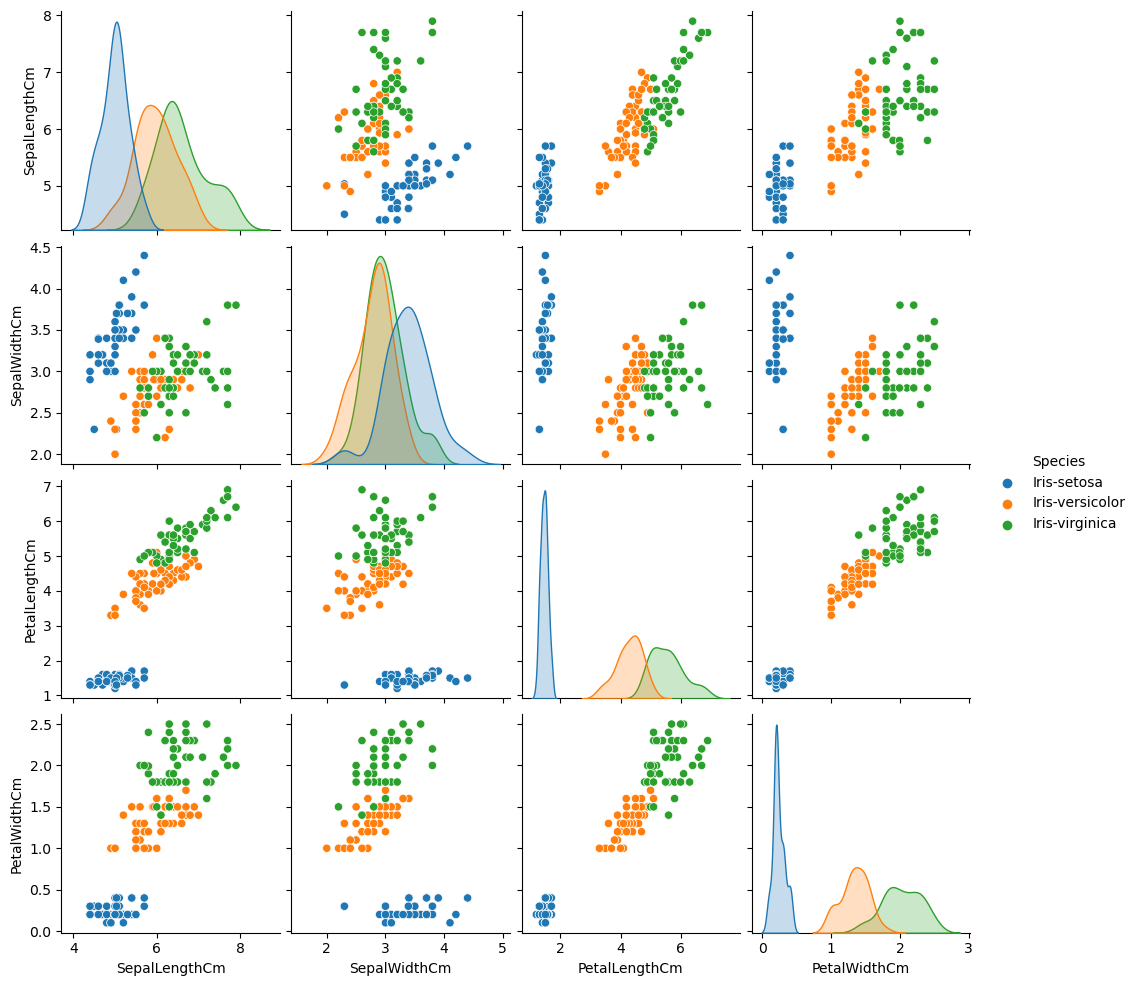

In [35]:
sns.pairplot(dataC, hue="Species")#en önemli görüntüleme araçlarından birisi

In [36]:
def single_feature_prediction (petal_length):
     if petal_length < 2.5:
         return 0
     elif petal_length < 4.8:
         return 1
     else:
         return 2

Örneğin üst tarafta vermiş olduğum if kodu temelde manuel bir makine öğrenmesi sistemini temsil eder. Kendim, verileri seaborn'da görerek, hangi uzunluklara göre sınıflandırma yapmamız gerektiğini gördüm ve buna göre if-elif-else kodu yazdım. Temelde basit karar ağacı sistemleri de budur.

In [37]:
[single_feature_prediction(val) for val in x_train["PetalLengthCm"].values] #petal lenght uzunluklarını .values ile sadece değer olarak çektim ve
#oluşturduğumuz karar ağacı sistemine yükledim, aşağıda da bu karar ağacına göre alınan kararlar rahatlıkla görülebiliyor.

[2,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1]

In [38]:
manuel_ai = np.array([single_feature_prediction(val) for val in x_train["PetalLengthCm"].values])
manuel_ai #görüntü kolaylığı için np array'e dönüştürdüm.

array([2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2,
       2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1])

In [39]:
y_train["Species"].values == manuel_ai #görüldüğü üzere çoğu değeri bilmişim, güzel bir sonuç.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

In [40]:
(y_train["Species"].values == manuel_ai).mean() #%95 oranında doğruluk payım var.

0.9516129032258065

### Logistic Regression Modeling

Logistic Regression, sınıflandırma problemlerinde kullanılan bir makine öğrenimi modelidir. Bu model, bir girdi verildiğinde çıktının iki sınıfından birine ait olup olmadığını tahmin etmek için kullanılır. Örneğin, bir e-postanın spam veya spam olmayan olarak sınıflandırılması gibi bir problemin çözümünde kullanılabilir. Örnek bir uygulamada, Scikit-learn kütüphanesi kullanılarak bir veri setindeki verilerin bir müşterinin bir kredi kartı başvurusunu onaylama veya reddetme ihtimaline göre sınıflandırılması amacıyla bir Logistic Regression modeli oluşturulabilir.

![lojistik regresyon](https://miro.medium.com/max/1400/1*FgUTutnPXhx92LqdQVcMcw.jpeg)

![gruplandırma](https://miro.medium.com/max/567/1*eDeJCcodhj72njIo0x5j0A.jpeg)

regresyonun bir tarafında kalanlar 0 grubu, diğer tarafında kalanlar 1 grubu olur ve böylece ikili gruplandırma yaparız.

In [41]:
x_trainC = x_train.values.copy()
y_trainC = y_train.values.copy()

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()#modeli çektim
model.fit(x_trainC, y_trainC)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [43]:
model.score(x_trainC, y_trainC) #bu sistem özünde yanlış. asla veriyi train için kullanılan set ile değerlendirmeye çalışmamalısın.

0.9758064516129032

In [44]:
model.score(x_test, y_test) #bu sistem doğru.

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0

In [45]:
model.predict(x_test.values) #test verisini tahmin ediyorum.

array([1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 1])

In [46]:
print(y_test["Species"].values == model.predict(x_test.values)) #tahminimi karşılaştırıyorum
(y_test["Species"].values == model.predict(x_test.values)).mean()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


1.0

3169 seedinde = %100 başarı oranım olduğu açık. bu noktada şuna dikkat edilmeli ki y_test'in values'ini alırken column özelleştirmesi yaptım çünkü bunu yapmasaydım iki veri seti aynı yapıda olmuyordu. veri setlerinin yapısını sık sık kontrol etmek gerekiyor.

6969 seedinde = başarı oranım %90'a geriledi.

### Score Yöntemi

score yöntemi, verilerin doğru sıralamasına ne kadar yakın olduğunu ölçmek için tasarlanmıştır. 'Accuracy' (doğruluk) ile değil, 'R^2 score' (determinasyon katsayısı) ile ölçülür. Bu nedenle, score yöntemi daha doğru bir performans ölçümü sağlar.

.score fonksiyonu, scikit-learn kütüphanesindeki modellere göre farklı işlemler yapabilir. Scikit-learn kütüphanesi, sınıflandırma, regresyon, kümeleme, boyut indirgeme ve model seçimi gibi birçok makine öğrenmesi algoritması ve aracı içerir. Bu algoritmalar farklı amaçlarla tasarlanmıştır ve farklı performans metrikleri kullanabilirler. Bu nedenle, .score fonksiyonu, modelin türüne göre, farklı metrikler kullanabilir.

Örneğin, sınıflandırma modellerinde, .score fonksiyonu genellikle doğruluk (accuracy) metriğini kullanarak, modelin performansını değerlendirir. Doğruluk metriği, sınıflandırma probleminde doğru olarak sınıflandırılan örneklerin oranını ifade eder.

Regresyon modellerinde, .score fonksiyonu genellikle R-kare (R-squared) metriğini kullanarak, modelin performansını değerlendirir. R-kare metriği, regresyon modelinin verilerdeki değişkenliği ne kadar iyi açıkladığını ifade eder.

Kümeleme algoritmalarında, .score fonksiyonu genellikle inertia veya siluet katsayısı gibi kümeleme performans metriklerini kullanarak, modelin performansını değerlendirir.

Sonuç olarak, .score fonksiyonu, scikit-learn kütüphanesindeki model türüne ve modelin performansını ölçmek için kullanılan metriklere bağlı olarak, farklı işlemler yapabilir.

### İterasyon ve Overfitting Üzerine
İterasyon, bir algoritmanın belirli bir adımda yaptığı işlemin tekrarlanmasıdır. Lojistik regresyon gibi bir algoritma, veri kümesi üzerinde bir dizi işlem gerçekleştirir. Bu işlemler, modelin hedef değişkeni ile diğer özellikler arasındaki ilişkiyi hesaplamayı içerir.

Bir iterasyon, bu işlemlerin bir defada tamamlanmasıdır. Model eğitim sürecinde, iterasyonlar bir dizi ağırlık ve bias (davranış eğilimi) parametresi kullanılarak gerçekleştirilir. İterasyonlar, ağırlık ve bias parametrelerinin ayarlandığı ve modelin sonuçlarının hesaplandığı adımlardır.

Scikit-learn kütüphanesinde lojistik regresyon modelinin eğitimini gerçekleştirirken, eniyileme işlemi için varsayılan olarak "lbfgs" adı verilen bir yöntem kullanılır. Bu yöntem, varsayılan olarak 100 iterasyon çalıştırır ve bu iterasyon sayısı, "max_iter" parametresi aracılığıyla ayarlanabilir.

"max_iter" parametresi, modelin eğitiminde kullanılan eniyileme yönteminin maksimum iterasyon sayısını belirtir. Bu parametrenin değeri, modelin konverjansına ve hesaplama kaynaklarına bağlı olarak değişebilir. Yeterli sayıda iterasyon yapmadan veya aşırı iterasyon yaparak overfitting yapabilirsiniz. Eğer modelinizin performansı, iterasyon sayısını artırarak daha iyi sonuçlar veriyorsa, artan iterasyon sayısı ile daha iyi sonuçlar alabilirsiniz. Ancak, bu değişikliklerin modelinizi aşırı uydurma (overfitting) yapmadığından emin olmalısınız. Aşırı uydurma, modelin train setinde çok iyi performans göstermesine rağmen, test setinde veya gerçek dünya verilerinde iyi performans gösterememesi durumudur. 

![overfitting](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)
![overfitting](https://www.veribilimiokulu.com/wp-content/uploads/2020/02/overfit.jpg)
![overfitting](https://miro.medium.com/max/1342/0*x1Z4WPYUgoHZn-Jm.png)



### Ağırlık ve Bias
Ağırlık ve bias, lojistik regresyon gibi birçok makine öğrenimi algoritması için önemli parametrelerdir. Bu parametreler, modelin hedef değişkeni ile diğer özellikler arasındaki ilişkiyi hesaplamaya yardımcı olur.

Ağırlık parametreleri, modeldeki her bir özelliğin önemini belirleyen sayısal değerlerdir. Model, veri kümesindeki her bir özelliği bir ağırlık ile çarparak, sonuçları hesaplar. Bu ağırlıklar, modelin eğitim sürecinde belirlenir.

Bias (baz terimi) parametresi ise, modelin çıktı değerine eklenen sabit bir değerdir. Bias, modelin hedef değişkeni ile diğer özellikler arasındaki ilişkiyi daha hassas bir şekilde hesaplamasına yardımcı olur. Bias, modelin eğitim sürecinde belirlenir.

![](https://miro.medium.com/max/969/1*lTVBIHr2cjsVoik9gzrBvw.jpeg)
![](https://miro.medium.com/max/1280/1*wO1Nm5ve_Nffo7oQhfxLew.png)
![](https://miro.medium.com/max/1318/0*NmhxqGhyUiXjc4Ar.jpg)

### Cross Validation Tekniği
Cross validation, verileri birkaç parçaya ayırarak, her parçanın sırayla test seti olarak kullanılmasını ve geri kalanların train seti olarak kullanılmasını içerir. Bu işlem, her bir parçanın test seti olarak kullanılmasıyla birçok farklı train/test seti oluşturulmasına yol açar. Her bir train/test seti için model, train seti üzerinde eğitilir ve test seti üzerinde değerlendirilir. Sonuçlar, tüm test setlerinin sonuçlarından elde edilen bir ortalama performans ölçütüne dayanarak rapor edilir. Bu yöntem, modelin performansını daha doğru bir şekilde değerlendirmesine ve overfitting (aşırı uyum) veya underfitting (aşırı uyumsuzluk) gibi problemlerin tespit edilmesine yardımcı olur. Ayrıca, cross validation, modelin hiperparametrelerinin ayarlanması için kullanılabilir.
![](https://miro.medium.com/max/800/1*kkMtezwv8qj1t9uG4nw_8g.png)

In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [48]:
model = LogisticRegression(max_iter=200)#default 100'dü, iter sayısını 200'e çektim

In [49]:
cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy") #cross val sistemi ile modellerin skoruna bakıyorum
#cv ile kaça bölüneceğini seçtim, üst görseldeki gibi 5 seçtim. gel gelelim varsayılan da zaten 5'tir.
#scoring parametresi, cross-validation yöntemi kullanılarak model performansının ölçülmesinde kullanılacak ölçütü belirler. 
#Bu ölçüt, bir dizi metrik arasından seçilebilir ve accuracy, precision, recall, f1_score gibi birçok ölçüt içerir.

array([1.        , 0.96      , 1.        , 0.96      , 0.95833333])

In [50]:
np.mean(cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy")) #%97 oranında biliyoruz, güzel.

0.9756666666666666

ilk önce verileri train ve test setlerine ayırmanız gerekir ve daha sonra cross_val_score fonksiyonunu yalnızca train seti üzerinde kullanmanız gerekir.

cross_val_score fonksiyonu, veri kümesini kendi içinde train ve test setlerine ayırır ve bu setleri kullanarak modelin performansını değerlendirir. Bu işlem, cross_val_score fonksiyonu içinde gerçekleşir ve veri kümesi, cv parametresinde belirtilen sayıda k-fold cross validation işlemi kullanılarak train ve test setlerine ayrılır.

**++++** model.fit(x_trainC, y_trainC) bu kod ile xtrain'i ytrain'e göre eğitiyoruz.

model.predict(x_test.values) sonra da bu kod ile xtest'i veriyoruz ve alınan eğitime göre ytest tahmin ediliyor.

peki:

cross_val_predict(model, x_trainC, y_trainC.ravel(), cv=5) bu kod ne yapıyor?
cross_val_predict fonksiyonu, veri kümesini k-fold cross-validation yöntemini kullanarak train ve test setlerine ayırır ve her bir test seti için tahminlerde bulunur.

**----** Öncelikle, cross_val_predict fonksiyonu, veri kümesini cv parametresinde belirtilen sayıda (örneğin, 5) k-fold cross-validation fold'lara ayırır. Daha sonra, her bir fold için, diğer fold'ları train seti olarak kullanarak modeli eğitir ve test seti üzerinde tahminlerde bulunur. Bu işlem, cv sayısı kadar kez yapılır ve her bir test seti için bir tahmin değeri üretilir.

Sonuç olarak, cross_val_predict fonksiyonu, her bir örneğin hangi fold'da yer aldığını hesaba katarak, k-fold cross-validation yöntemini kullanarak, her bir örneğin için bir tahmin değeri üretir. Bu tahminler, gerçek y değerleri ile karşılaştırılarak, modelin performansını değerlendirmek için kullanılabilir.

Bu yöntem, veri kümesini kendi içinde train ve test setlerine ayırarak, her bir örneğin birden fazla kez tahmin edilmesine ve bu tahminlerin ortalamasının alınmasına olanak sağlar. Bu da, modelin performansının daha doğru bir şekilde değerlendirilmesine yardımcı olur.

**++++** yani burada y_trainC ile mi karşılaştırma yapmalıyız?

**----** Evet, cross_val_predict fonksiyonu, her bir test seti için tahminlerde bulunarak, bu tahminleri gerçek y değerleriyle karşılaştırır. Daha sonra, tahmin edilen değerlerin gerçek değerlere olan benzerliği ölçülerek, modelin performansı hesaplanır.

Özetle, cross_val_predict fonksiyonu, x_trainC veri kümesi üzerinde k-fold cross-validation yöntemini kullanarak modelin performansını ölçer ve tahmin edilen değerleri gerçek y değerleriyle karşılaştırarak performans ölçüsünü hesaplar. Bu nedenle, y_trainC gerçek y değerleri ile karşılaştırılır ve modelin performansı, gerçek y değerlerine olan benzerliği ölçülerek hesaplanır.

### Neyi Kaçırıyoruz?
Her modelde kaçırdığımız noktalar olması doğaldır, peki neyi kaçırıyoruz, bunun üzerine gitmeliyiz.

In [51]:
cross_val_predict(model, x_trainC, y_trainC.ravel(), cv=5) == y_train["Species"].values #neyi kaçırdığımıza bakıyorum

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

In [52]:
#üstte false olan dataları görmek istiyorum.
x_trainC[~(cross_val_predict(model, x_trainC, y_trainC.ravel(), cv=5) == y_train["Species"].values)]#tilda koyarak sadece true'ları değil sadece false'ları
#göstermesini sağladım

array([[6. , 2.7, 5.1, 1.6],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7]])

Bunlar kaçırdığımız array'ler. Bu array'lerin konumlarını çeşitli yöntemlerle asıl datasette tespit edebilir, görebilir, hatta scatterplotta da belli edebiliriz fakat şu anki noktada bunu merak ederek vakit kaybetmek istemiyorum.

### Model Tuning

Model tuning, bir makine öğrenimi modelinin hiperparametrelerini optimize etmek için yapılan işlemlerdir. Hiperparametreler aslında modelinizin çalışmasını sağlayan parametreler/girdiler/özellikler/yöntemlerdir ve bunları tespit etmek de işin parçasıdır. Model tuning, bir modelin performansını artırarak daha doğru tahminler yapmasına yardımcı olabilir. Ancak, model tuning işlemi, veri seti üzerinde overfitting'e neden olabileceği için dikkatli bir şekilde yapılmalıdır. Bu nedenle, model tuning işlemi, aynı zamanda bir doğrulama seti kullanarak, modelin genelleştirilebilirliğini artırmak için de yapılan bir işlemdir.

Eğer farklı model tiplerini deneyip, bu modellerin hiperparametrelerini ayarlayarak performanslarını ölçüp, sonrasında en iyi sonucu veren modeli seçtiyseniz, bu bir tür model tuning işlemi olarak değerlendirilebilir.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier()
accs = cross_val_score(model,x_trainC,y_trainC.ravel(),cv=5, scoring="accuracy")
np.mean(accs) #bu yöntemle %96 oldu, tamamen farklı bir model metodu kullandık.

0.9676666666666666

Bunun gibi birçok eğitim modeli mevcut. Bunların kullanım alanlarını ve hangilerinin hangi şartlarda kullanılması gerektiğini bilmek gerekiyor. [Buradan](https://scikit-learn.org/stable/user_guide.html) "Supervides Learning" ve "Unsupervised Learning" dökümantasyonlarına göz atılabilir. Bütün bu kavramların açıklandığı ve modellerin tanımlandığı notları daha sonra ekleyeceğim.

Şimdi, lojistik regresyondan devam edelim.

**Soru şu ki bazı modeldei bazı parametrelerimizi değiştirirsek daha iyi sonuçlar elde edebilirmemiz mümkün mü?**

In [55]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

Burada çok önemli parametreler mevcut. Bu noktada, bu önemli parametreler içerisinden, C'ye değinmek istiyorum. **C, herhangi bir istatistik model içerisinde, yani herhangi bir makine öğrenmesi model içerisinde, en önemli parametlerden bir tanesi.** C'nin işlevi modelimizin ne kadar flexbility/hareketlilik/akışkanlık/değişkenlik/uyumluluk göstereceğini belirlemesi olacak, fakat bu durum her zamanki gibi overfitting'e doğru da gidebilir. C hiperparametresi, regülerizasyon katsayısıdır ve modelin overfitting ve underfitting arasındaki dengeyi ayarlamasına yardımcı olur. C parametresinin değeri, 1/λ (λ regülerizasyon katsayısı) ile ters orantılıdır.

C parametresinin değeri büyük olduğunda, regülerizasyon katsayısı azalır ve modelin eğitim setine daha iyi uymasına izin verir. Bu nedenle, C parametresinin büyük olduğu durumlarda, modelin eğitim setine fazla uyduğu ve test setinde daha kötü performans gösterdiği overfitting riski yüksektir. **Bu nedenle, büyük veri setleri üzerinde C parametresinin değeri düşük tutulabilir.**

C parametresinin değeri küçük olduğunda, regülerizasyon katsayısı artar ve modelin overfitting riski azalır. Ancak, C parametresinin çok düşük olması da underfitting riski taşır ve modelin eğitim setinde ve test setinde kötü performans göstermesine neden olabilir. **Bu nedenle, küçük veri setleri üzerinde C parametresinin değeri daha yüksek tutulabilir.**

C parametresi, **Grid Search** ve **Cross Validation** gibi model tuning yöntemleri kullanılarak belirlenebilir. Grid Search, farklı C parametresi değerleri için model performansını ölçerek en iyi C parametresi değerini bulur. Cross Validation, farklı C parametresi değerleri için model performansını ölçerek, genelleştirilebilir bir model için en uygun C parametresi değerini bulur. Bunlara daha sonra değineceğiz.

In [56]:
model = LogisticRegression(max_iter=200, C=0.1) # C'yi aldığım değerlere dikkat.
accuracies = cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy")
np.mean(accuracies)

0.9433333333333334

In [57]:
model = LogisticRegression(max_iter=200, C=1) # C'yi aldığım değerlere dikkat.
accuracies = cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy")
np.mean(accuracies)

0.9756666666666666

In [58]:
model = LogisticRegression(max_iter=200, C=0.10) # değerim düşmeye başladı. Demek ki C'yi 1 aralığında gezdirmek doğru gibi duruyor.
accuracies = cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy")
np.mean(accuracies)

0.9433333333333334

In [59]:
for reg_param in (1, 1.3, 2, 5, 10, 100):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:2f}%") #for döngüsü ile denemeler yapıyorum.

1
Accuracy: 97.566667%
1.3
Accuracy: 97.566667%
2
Accuracy: 97.566667%
5
Accuracy: 97.566667%
10
Accuracy: 96.766667%
100
Accuracy: 95.133333%


In [60]:
for reg_param in (0.5, 1, 2, 5, 8, 100):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:2f}%") #for döngüsü ile denemeler yapıyorum.

0.5
Accuracy: 95.966667%
1
Accuracy: 97.566667%
2
Accuracy: 97.566667%
5
Accuracy: 97.566667%
8
Accuracy: 96.766667%
100
Accuracy: 95.133333%


In [61]:
for reg_param in (0.7, 1, 2, 5, 6, 7):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_trainC, y_trainC.ravel(), cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:2f}%") #for döngüsü ile denemeler yapıyorum.

0.7
Accuracy: 96.766667%
1
Accuracy: 97.566667%
2
Accuracy: 97.566667%
5
Accuracy: 97.566667%
6
Accuracy: 97.566667%
7
Accuracy: 97.566667%


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Final Data ve Testleri Görme

Üstte yaptığım denemeler sonucu açıkça görebiliyorum ki 1'den 7'ye kadar maksimum verimi almaktayım. O halde, güzel bir final model olduğuna inandığım, C=1 değerini final modelimde baz alacağım. Şimdi, test setimizde sonuçları görme zamanıç

In [62]:
model = LogisticRegression(max_iter=200, C=reg_param)

In [63]:
x_trainC

array([[6.5       , 3.        , 5.2       , 2.        ],
       [6.4       , 2.9       , 4.3       , 1.3       ],
       [5.6       , 2.7       , 4.2       , 1.3       ],
       [4.8       , 3.        , 1.4       , 0.1       ],
       [6.        , 3.4       , 4.5       , 1.6       ],
       [5.4       , 3.4       , 1.5       , 0.4       ],
       [6.1       , 2.8       , 4.7       , 1.2       ],
       [7.7       , 2.6       , 6.9       , 2.3       ],
       [6.        , 2.2       , 5.        , 1.5       ],
       [5.1       , 3.8       , 1.6       , 0.2       ],
       [5.7       , 3.        , 4.2       , 1.2       ],
       [6.1       , 2.8       , 4.        , 1.3       ],
       [7.7       , 3.8       , 6.7       , 2.2       ],
       [4.9       , 3.1       , 1.5       , 0.1       ],
       [6.4       , 2.8       , 5.6       , 2.2       ],
       [5.8       , 2.7       , 5.1       , 1.9       ],
       [5.5       , 2.6       , 4.4       , 1.2       ],
       [4.4       , 3.2       ,

In [64]:
y_trainC.ravel()

array([2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2,
       2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1])

In [65]:
x_testC = x_test.copy()
x_testC = x_testC.values
x_testC

array([[6.3       , 2.3       , 4.4       , 1.3       ],
       [4.7       , 3.2       , 1.3       , 0.2       ],
       [4.7       , 3.2       , 1.6       , 0.2       ],
       [6.4       , 2.8       , 5.6       , 2.1       ],
       [5.8       , 2.8       , 5.1       , 2.4       ],
       [6.        , 2.9       , 4.5       , 1.5       ],
       [6.2       , 3.4       , 5.4       , 2.3       ],
       [4.4       , 3.        , 1.3       , 0.2       ],
       [5.1       , 3.8       , 1.5       , 0.3       ],
       [6.9       , 3.2       , 5.7       , 2.3       ],
       [5.03448276, 3.7       , 1.5       , 0.4       ],
       [6.7       , 3.3       , 5.7       , 2.5       ],
       [5.1       , 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.1       , 1.5       , 0.1       ],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 2.3       , 3.3       , 1.        ],
       [5.2       , 4.1       , 1.5       , 0.1       ],
       [4.6       , 3.4       ,

In [66]:
y_testC = y_test.copy()
y_testC = y_testC.values
y_testC.ravel()

array([1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 1])

In [67]:
model.fit(x_trainC, y_trainC.ravel())

LogisticRegression(C=7, max_iter=200)

In [68]:
y_test_pred = model.predict(x_testC)
y_test_pred == y_testC.ravel()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Görüldüğü üzere, yüzde yüz bilmişiz. Durum şu ki genelde makine öğrenmesi işlemlerinde başarısız oluruz. Bu not defterinde kullanılan veri seti başlangıç için son derece uygun olabilmesi adına aşırı basite indirgendiği için aslında bu durumdayız.

In [69]:
y_test_pred

array([1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 1])

In [70]:
y_testC.ravel()

array([1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 0, 1])

### CONFISUON MATRIX

Confusion matrix, sınıflandırma modelinin performansını değerlendirmek için kullanılan bir araçtır. Bu matris, gerçek sınıflar ile model tarafından tahmin edilen sınıflar arasındaki ilişkiyi görselleştirir ve modelin doğruluğunu, hassasiyetini, özgünlüğünü ve F1 puanını hesaplamak için kullanılabilir.

Confusion matrix, dört farklı öğe içerir: True Positive (TP), False Positive (FP), True Negative (TN) ve False Negative (FN). TP, model tarafından doğru şekilde tahmin edilen pozitif örnek sayısını, FP yanlış şekilde pozitif olarak tahmin edilen örnek sayısını, TN doğru şekilde negatif olarak tahmin edilen örnek sayısını, FN ise yanlış şekilde negatif olarak tahmin edilen örnek sayısını ifade eder.

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
accuracy_score(y_testC.ravel(), y_test_pred) #önce doğru değerleri, sonra bizim tahminimizi veriyoruz. yüzde yüz doğru bildiğimizi söylüyor.

1.0

In [73]:
confusion_matrix(y_testC.ravel(), y_test_pred) #önce doğru değerleri, sonra bizim tahminimizi veriyoruz. burada confusion matriximizi görebiliriz
#   0 1  2 (tahminler)
#0 14 0  0
#1 0  8  0
#2 0  0  9
#(doğru değerler)
#hepsini doğru tahmin ettiğimiz için yüzde yüz eşleşiyor, eşleşmeyen değerler yanlış tahmin ettiklerimiz olacaktı.

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  9]])

## MODELLER VE ÖZELLİKLERİ
Makine öğrenmesinde farklı amaçlara yönelik olarak tasarlanmış birçok model tipi mevcuttur.

**Denetimli (Supervised) Öğrenme:** Denetimli öğrenme, öğrenme sürecinde girdi-veri çiftleri ile öğrenen bir modelin kullanıldığı bir makine öğrenmesi türüdür. Model, bir girdi verildiğinde, doğru çıktıyı üretmek için eğitilir. Bu tür modellerin örnekleri arasında sınıflandırma (classification) ve regresyon (regression) modelleri yer alır. Sınıflandırma modelleri, girdi verilerini belirli sınıflara ayırmaya çalışırken, regresyon modelleri, girdi verilerini sayısal bir çıktıya dönüştürmeye çalışır.

Örneğin:

Görüntü Sınıflandırma: Görüntü sınıflandırma, birçok farklı endüstride kullanılan bir denetimli öğrenme tekniğidir. Örneğin, tıp alanında, doktorların kanserli hücreleri teşhis etmek için bir tıbbi görüntüye baktığı durumlarda kullanılır. Bu model, görsel verileri (girdi) kullanarak kanserli veya kansersiz hücrelerin belirlenmesi (çıktı) amacıyla eğitilir.

Doğal Dil İşleme: Doğal Dil İşleme (NLP), dil öğrenmeyle ilgili birçok uygulama için kullanılan bir denetimli öğrenme tekniğidir. Örneğin, spam filtreleme için e-posta metinlerini sınıflandırmak, duygu analizi yapmak, metinlerdeki belirli bilgileri çıkarmak için kullanılır. Bu modeller, kelime veya metin verilerini (girdi) kullanarak, belirli bir sınıfa atama yapmak (çıktı) için eğitilir.

**Denetimsiz (Unsupervised) Öğrenme:** Denetimsiz öğrenme, girdi verilerindeki yapıyı veya kalıpları keşfetmek için kullanılan bir makine öğrenmesi türüdür. Bu tür modellerin eğitimi için herhangi bir doğru çıktıya ihtiyaç yoktur. Bu tür modellerin örnekleri arasında kümeleme (clustering) ve boyut azaltma (dimensionality reduction) modelleri yer alır. Kümeleme modelleri, verileri benzer özelliklere sahip gruplara ayırmaya çalışırken, boyut azaltma modelleri, veri setindeki değişken sayısını azaltmaya veya verilerin görselleştirilmesini kolaylaştırmaya çalışır.

Örneğin:

Kümeleme: Kümeleme, birçok farklı veri türünde kullanılan bir denetimsiz öğrenme tekniğidir. Örneğin, müşteri segmentasyonu, pazarlama analizi, veri keşfi, sosyal ağ analizi, vb. alanlarda kullanılır. Bu modeller, verileri gruplara ayırmak ve benzer özelliklere sahip verileri bir araya getirmek için kullanılır.

Boyut Azaltma: Boyut azaltma, yüksek boyutlu veri setlerindeki karmaşıklığı azaltmak için kullanılan bir denetimsiz öğrenme tekniğidir. Bu modeller, verilerin boyutunu azaltarak, verilerin görselleştirilmesini ve analizini kolaylaştırır. Örneğin, bir görüntüdeki piksel sayısının azaltılması, veri setindeki gereksiz değişkenlerin kaldırılması gibi. Boyut azaltma teknikleri, genellikle sınıflandırma ve regresyon gibi denetimli öğrenme teknikleri ile birlikte kullanılır.

### SUPERVISED ÖĞRENME

**Sınıflandırma (Classification)**
Sınıflandırma, bir veya daha fazla sayısal ve/veya kategorik değişkeni (predictor veya öznitelik) kullanarak bir kategorik değişkenin (hedef veya sınıf) değerini tahmin etmek için bir model oluşturulan bir veri bilimi görevidir.

Sınıflandırma algoritmaları genellikle dört ana grupta incelenir:

1. Frekans Tablosu
    * ZeroR
    * OneR
    * Naive Bayes
    * Karar Ağacı (Decision Tree)
2. Kovaryans Matrisi (Covariance Matrix)
    * Doğrusal Diskriminant Analizi (Linear Discriminant Analysis)
    * Lojistik Regresyon (Logistic Regression)
3. Benzerlik Fonksiyonları (Similarity Functions)
    * K En Yakın Komşu (K Nearest Neighbors)
4. Diğerleri
    * Yapay Sinir Ağı (Artificial Neural Network)
    * Destek Vektör Makinesi (Support Vector Machine)
    
Bu algoritmalar farklı amaçlara ve veri türlerine göre seçilir ve uygulanabilir. Bu algoritmaların ayrıntılı açıklamaları için [tıklayın](http://www.saedsayad.com/classification.htm).

![](https://erdincuzun.com/wp-content/uploads/2017/2016/genel/futbol_veri.png)

#### ZeroR

**ZeroR, sınıflandırma algoritmalarının en basitidir ve tüm tahminleri sınıfın en yaygın değeri ile yapar.** Örneğin, bir veri kümesinde 2000 gözlem varsa ve bu gözlemlerin 1800'ü "A" sınıfına ve 200'ü "B" sınıfına aitse, ZeroR, tüm tahminleri "A" sınıfıyla yapar.

Örneğin:

Diyelim ki bir hava tahmin uygulaması için bir sınıflandırma modeli geliştirmek istiyorsunuz. Bu model, hava durumu koşullarını (sıcaklık, rüzgar hızı, nem, vs.) kullanarak, o gün futbol oynanıp oynanamayacağını tahmin etmek için kullanılacaktır.

ZeroR sınıflandırması, hava durumu koşulları ne olursa olsun, her zaman en yaygın olan sınıf etiketini verir. Diyelim ki, son birkaç yılın verileri incelendiğinde, her zaman %60 olasılıkla futbolun oynandığı sonucu ortaya çıktı. Bu durumda, ZeroR sınıflandırması, herhangi bir hava koşulu olmasa bile, her zaman futbol oynanacağını tahmin edecektir. Nasıl olsa ZeroR'a göre %60 olasılıkla kazanma şansı vardır, bu yüzden her zaman futbol oynanmasını tahmin etmesinde problem olmaz.

Bu durumda ZeroR sınıflandırması, gerçek hayatta pek kullanışlı değildir, çünkü hava durumu koşulları, futbolun oynanıp oynanamayacağı hakkında önemli bir etkiye sahiptir. Daha karmaşık bir sınıflandırma modeli (mesela karar ağacı gibi), hava durumu koşullarını daha iyi değerlendirebilir ve tahminleri daha doğru bir şekilde yapabilir.

![](https://erdincuzun.com/wp-content/uploads/2017/2016/genel/futbol_sonuc.png)

#### OneR

**OneR, bir veri kümesindeki her bir özelliği (predictor veya öznitelik) tek tek inceler ve bu özelliklerden en iyisini seçer.** OneR sınıflandırması, sınıflandırılacak verilerin kategorik değişkenler olduğu durumlarda en etkili olanıdır. Özellikle, verilerin çok sayıda kategorik özellikle karakterize edildiği veri setleri için oldukça etkilidir.

Örneğin:

Bir marketteki müşterilerin satın alma davranışlarının tahmin edilmesini ele alalım. OneR sınıflandırması, müşteri satın alma alışkanlıklarını etkileyen özelliklerden birini (örneğin, ürün fiyatları) seçer ve bu özelliği kullanarak müşterilerin satın alma davranışlarını tahmin eder. Sistem, bir veri kümesindeki her bir özelliği (predictor veya öznitelik) tek tek inceler ve bu özelliklerden en iyisini seçer. En iyi özellik, sınıflandırma performansını artıran özelliktir. Genellikle, en iyi özellik, veriler arasındaki en güçlü ilişkiyi yansıtan özelliktir.

Yukarıdaki örnekte, OneR sınıflandırması, müşteri satın alma alışkanlıklarını etkileyen özelliklerden birini (örneğin, ürün fiyatları) seçebilir ve bu özelliği kullanarak müşterilerin satın alma davranışlarını tahmin edebilir. Ancak, OneR sınıflandırması yalnızca bir özellikle tahmin yapar ve bu nedenle diğer etkili özellikleri dikkate almaz.

En fazla Evet barındıran özellik durumu OneR için seçilir. Mesela üst taraftaki futbol örneğimizde açıkça görüyoruz ki hava durumu en etkili etken. Bu bağlamda OneR sadece hava durumunu seçecek ve buna göre karar verecektir.

![](https://erdincuzun.com/wp-content/uploads/2017/2016/genel/futbol_frekanslar_secim.jpg)

* IF Outlook = Sunny THEN Play = Yes
* IF Outlook = Overcast THEN Play = Yes
* IF Outlook = Rainy THEN Play= No


#### Naive Bayes

Naive Bayes, olasılık kurallarına dayanan bir sınıflandırma yöntemidir. **Bu yöntem, her özniteliğin sınıfı tahmin etmek için ne kadar etkili olduğunu hesaplar ve bu özelliklerin tüm kombinasyonlarını kullanarak sınıflandırma yapar.**

Naive Bayes sınıflandırması, diğer sınıflandırma yöntemleri kadar hassas sonuçlar verir ve genellikle doğal dil işleme, belge sınıflandırma ve e-posta spam filtreleme gibi uygulamalarda kullanılır.

Örneğin:

Bir e-posta spam filtreleme uygulaması düşünelim. Bu uygulama, bir e-postanın spam olup olmadığını tahmin etmek için Naive Bayes sınıflandırmasını kullanabilir. Bu sınıflandırma modeli, e-postadaki bazı anahtar kelimeleri veya ifadeleri analiz eder ve bu kelimelerin spam e-postalarda ne kadar yaygın olduğunu hesaplar. Daha sonra, bu verileri kullanarak, gelen e-postaların spam olup olmadığını tahmin eder.

Mesela futbol örneğimizden gidelim. (Görselde golf olarak verilmiş) Hava durumu özelinde bakacak olursak, hangi şartlarda futbol oynanıp oynanmaması gerektiğini aşağıdaki hesaplamalar üzerinden yapmaktadır.


![](http://www.saedsayad.com/images/Bayes_3.png)

#### Decision Tree

**Decision Tree, bir dizi karar noktası ve bunlara bağlı sonuçlarla bir grafik veya ağaç şeklinde temsil edilir.** Bu ağaç, veri kümesindeki özellikleri ve bu özelliklerin sınıfı nasıl etkilediğini gösterir.

Decision Tree sınıflandırması, veri setlerindeki karmaşık ilişkileri gösterir ve özellikle sınıflandırılacak verilerin birden fazla özellik içerdiği durumlarda etkilidir. 

Örneğin:

Bir bankanın müşterilerinin kredi başvurularını onaylamak için bir Decision Tree sınıflandırması kullanabiliriz. Bu model, müşterilerin finansal geçmişi, kredi notu, gelir düzeyi, vs. gibi bir dizi özelliği kullanarak, kredi başvurularını onaylamak veya reddetmek için kararlar verir. Kredi başvurularının onaylanıp onaylanmayacağını tahmin etmek için müşterilerin finansal geçmişi, kredi notu ve gelir düzeyi gibi bir dizi özelliği kullanır. Bu özelliklerin her biri, modelin sınıflandırma performansını artıran özelliklerdir.

![](http://www.saedsayad.com/images/Decision_Tree_1.png)

##### Algoritma Yapısı

Karar ağacı oluşturmak için temel algoritma J. R. Quinlan tarafından geliştirilen ID3'dür. ID3, geri dönüşsüz bir şekilde olası dalların aranmasını ve öğrenmeyi kapsayan yukarıdan aşağıya açgözlü bir arama kullanır. ID3, Entropi ve Bilgi Kazancı kullanarak bir karar ağacı oluşturur. ZeroR modelinde bir öngörücü yoktur, OneR modelinde en iyi öngörücüyü bulmaya çalışırız, Naive Bayesian tüm öngörücüleri Bayes teoremi ve öngörücüler arasındaki bağımsızlık varsayımları kullanarak içerir, ancak karar ağacı öngörücüler arasındaki bağımlılık varsayımlarıyla tüm öngörücüleri içerir. Yani, temel fark, Naive Bayes'in özellikler arasında bağımsızlık varsayımı yapması ve bu bağımsızlık varsayımına dayanarak sınıflandırma yapmasıdır. Karar ağacı ise, özellikler arasındaki bağımlılık ilişkilerini dikkate alır ve bu bağımlılıkları ağaç yapısı kullanarak sınıflandırma yapar.

![](http://www.saedsayad.com/images/Entropy.png)

##### Entropi

Karar ağacı, kök düğümden yukarıdan aşağıya doğru oluşturulur ve veriler benzer değerlere sahip örnekler içeren alt kümeler halinde bölünür (homojen). ID3 algoritması, bir örneğin homojenliğini hesaplamak için entropi kullanır. Örnek tamamen homojense, entropisi sıfırdır ve örneğin eşit olarak bölündüğü durumda entropisi bir olur.

Tekli entropi hesaplama:

![](http://www.saedsayad.com/images/Entropy_3.png)

Birden fazla entropi hesaplama:

![](http://www.saedsayad.com/images/Entropy_2.png)

##### Bilgi Kazancı

Bilgi kazancı, bir veri kümesi bir öznitelik üzerinde bölündüğünde entropideki azalmaya dayanır. Karar ağacı oluşturmak, en yüksek bilgi kazancını (yani, en homojen dalları) sağlayan özniteliği bulmakla ilgilidir.

Adımlar:

**1-) Hedefin entropisini hesaplayın.**

![](http://www.saedsayad.com/images/Entropy_target.png)

**2-) Veri kümesi farklı öznitelikler üzerinde bölünür. Her dalın entropisi hesaplanır ve orantılı olarak eklenir. Bölünme için toplam entropi elde edilir. Sonuçta elde edilen entropi başlangıçtaki entropiden çıkarılır. Sonuç, bilgi kazancı veya entropideki azalmadır.**

![](http://www.saedsayad.com/images/Entropy_attributes.png)
![](http://www.saedsayad.com/images/Entropy_gain.png)

**3-) En büyük bilgi kazancına sahip özniteliği (bizim örneğimizde hava durumu) karar düğümü olarak seçin, veri kümesini dallarına ayırın ve her dalda aynı süreci tekrarlayın.**

![](http://www.saedsayad.com/images/decision_tree_slices.png)

**4a-) Entropisi sıfır olan dal yaprak düğümüdür.**

![](http://www.saedsayad.com/images/Entropy_overcast.png)

**4b-) Entropisi sıfırdan büyük olan dal daha fazla bölünmeye ihtiyaç duyar.**

![](http://www.saedsayad.com/images/Entropy_Sunny.png)

**5-) Yaprak olmayan dallar için ID3 algoritması tekrarlanarak, tüm veriler sınıflandırılana kadar devam edilir.**

**6-) Karar aşaması oluşur.**

![](http://www.saedsayad.com/images/Decision_rules.png)



#### Linear Discriminant Analysis, Quadratic Discriminant Analysis ve Logistic Regression

Kovaryans: Olasılık teorisi ve istatistikte, kovaryans iki değişkenin birlikte ne kadar değiştiklerinin ölçüsüdür.

Kovaryans Matrisi: Bu ölçütlerin matrisi, toplandığı set.

Diskriminant: Gerçel katsayılı ikinci derece polinom denklemlerin çözümü için kullanılır.

LDA, verilerin farklı sınıflara ait olasılık yoğunluk fonksiyonlarının birbirinden ayrılabilirliği üzerine dayanır. Amaç, bu olasılık yoğunluk fonksiyonlarını en iyi şekilde ayırmak için bir dizi lineer kombinasyonu kullanmaktır. Bu lineer kombinasyonlar, diskriminant işlevleri olarak adlandırılır ve bir veri noktasının hangi sınıfa ait olduğunu tahmin etmek için kullanılır. 

Birden fazla tahminlerde farklı bir algoritma ile Quadratic Discriminant Analysis (QDA) da kullanılabilir. QDA, iki veya daha fazla sınıfa sahip veri setlerini sınıflandırmak için kullanılabilen, ikinci dereceden karar sınırları olan genel bir ayrım fonksiyonudur. QDA, LDA'dan daha fazla öngörülebilirlik gücüne sahiptir, ancak her sınıf için kovaryans matrisini tahmin etmesi gerekir. QDA, sınıfları birbirinden ayıran en iyi doğrusal olmayan yüzeyi belirler. Bu, daha esnek bir modeldir, ancak daha fazla parametre kullanır.

![](https://media.geeksforgeeks.org/wp-content/uploads/20210601183322/fileshow.png)

Logistic Regression, çıktı değişkeninin iki olası değere sahip olduğu durumlarda kullanılır (Örneğin, "evet" veya "hayır" gibi). Verilerin sınıflandırılmasında kullanılmak üzere, girdi değişkenleri ile çıktı değişkeni arasındaki ilişkiyi modeller. Bu ilişkiyi ölçmek için sigmoid fonksiyonu kullanılır ve çıktı değişkeninin olasılık dağılımı hesaplanır.

![](https://miro.medium.com/max/499/1*fQNbPl3NY4antjKJPeuxwA.png)

LDA ve Logistic Regression arasındaki temel fark, tahmin işleminde kullanılan modeldir. LDA, veriler arasındaki ayrımı belirlemek için diskriminant işlevlerini kullanırken, Logistic Regression, çıktı değişkeni ile girdi değişkenleri arasındaki ilişkiyi modellemek için sigmoid fonksiyonunu kullanır.

LDA, Logistic Regression'dan daha sınırlı bir algoritmadır, çünkü sadece doğrusal ayrım için uygundur. Ayrıca, sadece çoklu sınıf sınıflandırma problemleri için uygundur. Diğer yandan, Logistic Regression, doğrusal olmayan sınıflandırma problemleri için kullanılabilir ve ikili sınıflandırma problemleri için oldukça başarılıdır.

#### K Nearest Neighbors (KNN)

**Bu algoritma, verilerin benzerliğine dayalı olarak öngörü yapar.**

KNN, sınıflandırma problemlerinde kullanılır ve özellikle kümelerin ayrıştırılmasında etkilidir. KNN, örneğin bir veri noktasının sınıfını belirlemek için en yakın k komşusunun etiketlerini kullanır. Bu komsular örnek veri kümesinden alınır ve daha sonra belirli bir örneğin etiketini belirlemek için kullanılır.

![](https://miro.medium.com/max/1400/0*ksMa1Of3NFCvHo_Y)
![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image)

KNN algoritması, önceden eğitilmiş bir model gerektirmez, bu nedenle yeni veriler geldiğinde hızlı bir şekilde uygulanabilir. Ayrıca, çok sınıflı sınıflandırma problemlerinde de kullanılabilir.

Örneğin, bir e-ticaret sitesindeki müşterileri farklı kategorilere ayırmak için KNN kullanabiliriz. Bu durumda, müşterilerin satın alma geçmişlerini ve ilgi alanlarını kullanarak, benzer müşterileri bir araya getirebilir ve müşterileri farklı kategorilere ayırabiliriz.

Başka bir örnek, kanser teşhisi için KNN kullanabiliriz. Bu durumda, kanser hastalarının test sonuçlarını kullanarak, benzer özellikleri olan hastaları bir araya getirebilir ve hastaları kanserli veya kansersiz olarak sınıflandırabiliriz.

#### Yapay Sinir Ağları - Artificial Neural Network veya ANN

Biyolojik sinir sistemlerinden esinlenerek geliştirilen, verileri sınıflandırmak için kullanılan bir makine öğrenmesi algoritmasıdır. **Bu algoritma, sinir hücreleri (nöronlar) ve sinir ağı (neural network) olarak adlandırılan bir dizi matematiksel işlemi kullanır.**

ANN, sınıflandırma problemlerinde ve tahmin yapmak için kullanılır. ANN, birbirinden ayrılabilen sınıflar veya tahmin edilecek değerler arasındaki karmaşık ilişkileri belirlemek için kullanılır. ANN, veri setindeki desenleri belirler ve bu desenlere dayanarak sınıflandırma veya tahmin yapar.

ANN, önceden eğitilmiş bir model gerektirir. Bu nedenle, verilerin özelliklerini anlamak ve özellikleri en uygun şekilde kullanmak için uzun bir eğitim süreci gerektirir.

Örneğin, bir şirketin müşterilerini farklı kategorilere ayırmak için ANN kullanabiliriz. Bu durumda, müşterilerin satın alma alışkanlıkları, demografik özellikleri gibi özellikleri kullanarak, müşterileri farklı kategorilere ayırabiliriz.

Başka bir örnek ise, bir bankanın müşterilerinin kredi notunu tahmin etmek için ANN kullanabiliriz. Bu durumda, müşterilerin ödeme geçmişleri, gelir seviyeleri, borçlanma oranları gibi değişkenleri kullanarak, müşterilerin kredi notunu tahmin edebiliriz.

ANN, son yıllarda birçok alanda yaygın olarak kullanılan bir sınıflandırma ve tahmin yöntemidir. Özellikle büyük veri setlerinde, derin öğrenme teknikleri ile birleştirilerek kullanıldığında, yüksek doğruluk oranları elde edilebilir.

##### Algoritma 

Bir Yapay Sinir Ağı (Artificial Neural Network veya ANN), birbirleriyle bağlantılı bir dizi matematiksel işlemi gerçekleştiren çok sayıda nöron veya sinir hücresinden oluşur. ANN'ler, girdi verilerini işlerken birçok farklı nöron kullanır. Bu nöronlar, girdi verilerini işlemek, sonuçları çıkarmak ve sonuçları yorumlamak için tasarlanmıştır.

![](http://www.saedsayad.com/images/ANN_1.png)

ANN'lerde, üç ana nöron tipi vardır:

Giriş Nöronları: Giriş nöronları, ANN'in giriş katmanında bulunur. Bu nöronlar, veri setindeki girdileri kabul eder ve nöral ağın geri kalanına iletilir. Girdi nöronları, her biri bir girdi değişkenini temsil eden sayısal değerlerle beslenir.

Gizli Nöronlar: Gizli nöronlar, girdi nöronlarından gelen sinyalleri işler ve bir sonraki katmana iletilen çıktılar üretir. Bu nöronlar, sınıflandırma veya tahmin yapmak için kullanılan matematiksel işlemleri gerçekleştirir.

Çıkış Nöronları: Çıkış nöronları, nöral ağın çıkış katmanında bulunur. Bu nöronlar, sonuçları çıkarmak için kullanılır. ANN'nin çıkışı, sınıflandırma problemleri için tahmin edilen sınıf etiketi veya regresyon problemleri için tahmin edilen değer olabilir.

Giriş nöronlarından başlayarak, gizli nöronlardan geçerek çıkış nöronlarına doğru ilerleyen bir Yapay Sinir Ağı, verileri işleyebilir ve sonuçları tahmin edebilir. Bu işlem sırasında, her nöron diğer nöronlarla bağlantılıdır ve bu bağlantılar ağırlıklarla belirlenir. Bu ağırlıklar, nöral ağın eğitimi sırasında öğrenilir ve sonuçların daha doğru bir şekilde tahmin edilmesine yardımcı olur.

##### Feedforward Neural Network (FFNN) ve Backward Error Propagation (BEP) 

Genellikle Feedforward Neural Network (FFNN) ve Backward Error Propagation (BEP) birlikte kullanılır. **FFNN, verileri ağın girdi katmanından çıkış katmanına doğru ilerletir ve sonuçları toplar. BEP ise ağın ağırlıklarını öğrenmek için kullanılır. BEP, ağın çıktılarının gerçek çıktılardan farkını hesaplar ve bu hatayı geriye doğru ağın katmanlarına yayarak, ağın ağırlıklarının güncellenmesine neden olur.**

![](http://www.saedsayad.com/images/ANN_4.png)

FFNN ve BEP birlikte kullanıldığında, ağın performansı ölçülebilir ve geliştirilebilir. Ağın çıkışı gerçek çıktılarla karşılaştırılır ve hata hesaplanır. Bu hata, BEP ile geriye doğru yayılarak, ağın ağırlıklarının güncellenmesine neden olur. Bu işlem, ağın performansını arttırır ve daha doğru sonuçlar elde edilmesini sağlar.

Ancak, FFNN ve BEP birlikte kullanmak tek doğru yol değildir. Diğer öğrenme teknikleri de kullanılabilir ve hangi tekniklerin kullanılacağı, verilerin özelliklerine ve problemin gereksinimlerine göre değişebilir.

##### Algoritma Teknikleri

Transfer fonksiyonu, ANN'nin her nöronunun girdi sinyallerini işleyerek çıktı sinyallerine dönüştürmesini sağlayan bir matematiksel işlemdir. İşlev, nöronun aktivasyon düzeyini ve çıkışını belirler. Transfer fonksiyonu, nöronun hangi sinyalleri iletmesi gerektiğini ve hangilerinin iletmemesi gerektiğini belirler.

Dört tür transfer fonksiyonu yaygın olarak kullanılmaktadır:

Birim Adım (Unit step (threshold)): Bu fonksiyon, bir eşik değerinin üzerindeki girdileri 1'e, altındaki girdileri 0'a dönüştürür. Bu fonksiyon, sınıflandırma problemlerinde kullanılır.

![](http://www.saedsayad.com/images/ANN_Unit_step.png)

Sigmoid: Bu fonksiyon, sınırları olan bir eğri oluşturur ve girdileri bu eğri üzerindeki bir değere dönüştürür. Sigmoid fonksiyonu, genellikle lojistik regresyon ve yapay sinir ağlarında kullanılır.

![](http://www.saedsayad.com/images/ANN_Sigmoid.png)

Parçalı Doğrusal (Piecewise Linear): Bu fonksiyon, girdileri bir çizgi parçasının eğimine göre dönüştürür. Bu fonksiyon, sinir ağlarında kullanılan basit bir fonksiyondur.

![](http://www.saedsayad.com/images/ANN_piecewise.png)

Lineer(Linear): Lineer transfer fonksiyonu, girdilerin doğrusal olarak bir çıktıya dönüştürülmesini sağlar.

![](http://www.saedsayad.com/images/LinearFunction.png)

Gaussian: Bu fonksiyon, girdileri bir normal distrubituon yoğunluğu gibi bir çıktıya dönüştürür. Bu fonksiyon, sinir ağlarında verilerin düzenlenmesinde kullanılır.

![](http://www.saedsayad.com/images/ANN_Gaussian.png)

Transfer fonksiyonları, yapay sinir ağlarının performansını etkiler ve doğru fonksiyonun seçimi, veri seti özelliklerine ve kullanım amaçlarına bağlıdır.

#### Support Vector Machine (SVM)

SVM, özellikle küçük veri setlerinde iyi performans gösterir ve yüksek boyutlu verileri sınıflandırmak için etkilidir.

SVM, verileri sınıflandırmak için bir hipers düzlem oluşturur. Veriler, hipers düzlem üzerinde ayrılabilir şekilde düzenlenir. Daha sonra, sınıflandırılacak yeni veriler, hipers düzlem üzerindeki konumlarına göre sınıflandırılır.

![](https://miro.medium.com/max/1400/0*ecA4Ls8kBYSM5nza.jpg)

SVM, iki sınıflı ve çok sınıflı sınıflandırma problemleri için kullanılabilir. SVM, çekirdek fonksiyonu olarak adlandırılan bir yöntem kullanarak, doğrusal olmayan verileri sınıflandırmak için de kullanılabilir.

Bir örnek olarak, bir banka müşterilerini kredi puanlarına göre iyi veya kötü müşteriler olarak sınıflandırmak isteyebilir. Bu durumda, banka, SVM kullanarak müşterileri kredi puanlarına göre iki sınıfa ayırabilir ve yeni müşterilerin kredi puanlarını kullanarak sınıflandırabilir. SVM, ayrıca görüntü sınıflandırması gibi birçok alanda da kullanılabilir.


**Değinilecek Konular:**
* Grid Search en iyi C değeri
* Cross Validation en iyi C değeri
* NaN verileri doldurma şartları ve metotları
* Supervided modeller
* Unsupervised modeller
* Ödül-ceza sistemli modeller